## Importamos las librerias con las que vamos a trabajar

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [38]:
# 1) Cargar el dataset desde CSV
df = pd.read_csv("crop_recommendation_outlierless.csv")

# 2) Separar características (X) y etiqueta (y)
#    Asumiendo que las columnas son: N, P, K, temperature, humidity, ph, rainfall, label
X = df[["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]]
y = df["label"]

# 3) Convertir las etiquetas (strings de cultivos) a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:

# 4) División 70 % entrenamiento / 30 % prueba (estratificada para mantener proporción de clases)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.30,
    random_state=42,
    stratify=y_encoded
)

In [40]:

# 5) Usar GridSearchCV para optimizar max_depth del Decision Tree
param_grid = {
    "max_depth": list(range(1, 11))  # probamos profundidades de 1 a 10
}

dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Mejor max_depth encontrado:", grid.best_params_["max_depth"])
print("Mejor accuracy (CV) con ese max_depth: {:.4f}".format(grid.best_score_))
print("\n" + "="*50 + "\n")

Mejor max_depth encontrado: 10
Mejor accuracy (CV) con ese max_depth: 0.9783




In [41]:
# 6) Entrenar el árbol final con el max_depth óptimo
best_depth = grid.best_params_["max_depth"]
dt_final = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [42]:
# 7) Evaluar en el conjunto de prueba
y_pred = dt_final.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print(f"Accuracy en test (30%): {acc_test:.4f}\n")
print("Reporte de clasificación en test:\n")
print(classification_report(
    y_test, y_pred, target_names=label_encoder.classes_, zero_division=0
))
print("\n" + "="*50 + "\n")

Accuracy en test (30%): 0.9856

Reporte de clasificación en test:

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        30
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
        jute       0.88      0.97      0.92        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      1.00      1.00        18
    mungbean       0.97      1.00      0.98        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        24
      papaya       1.00      0.84      0.91        19
  pigeonpeas  

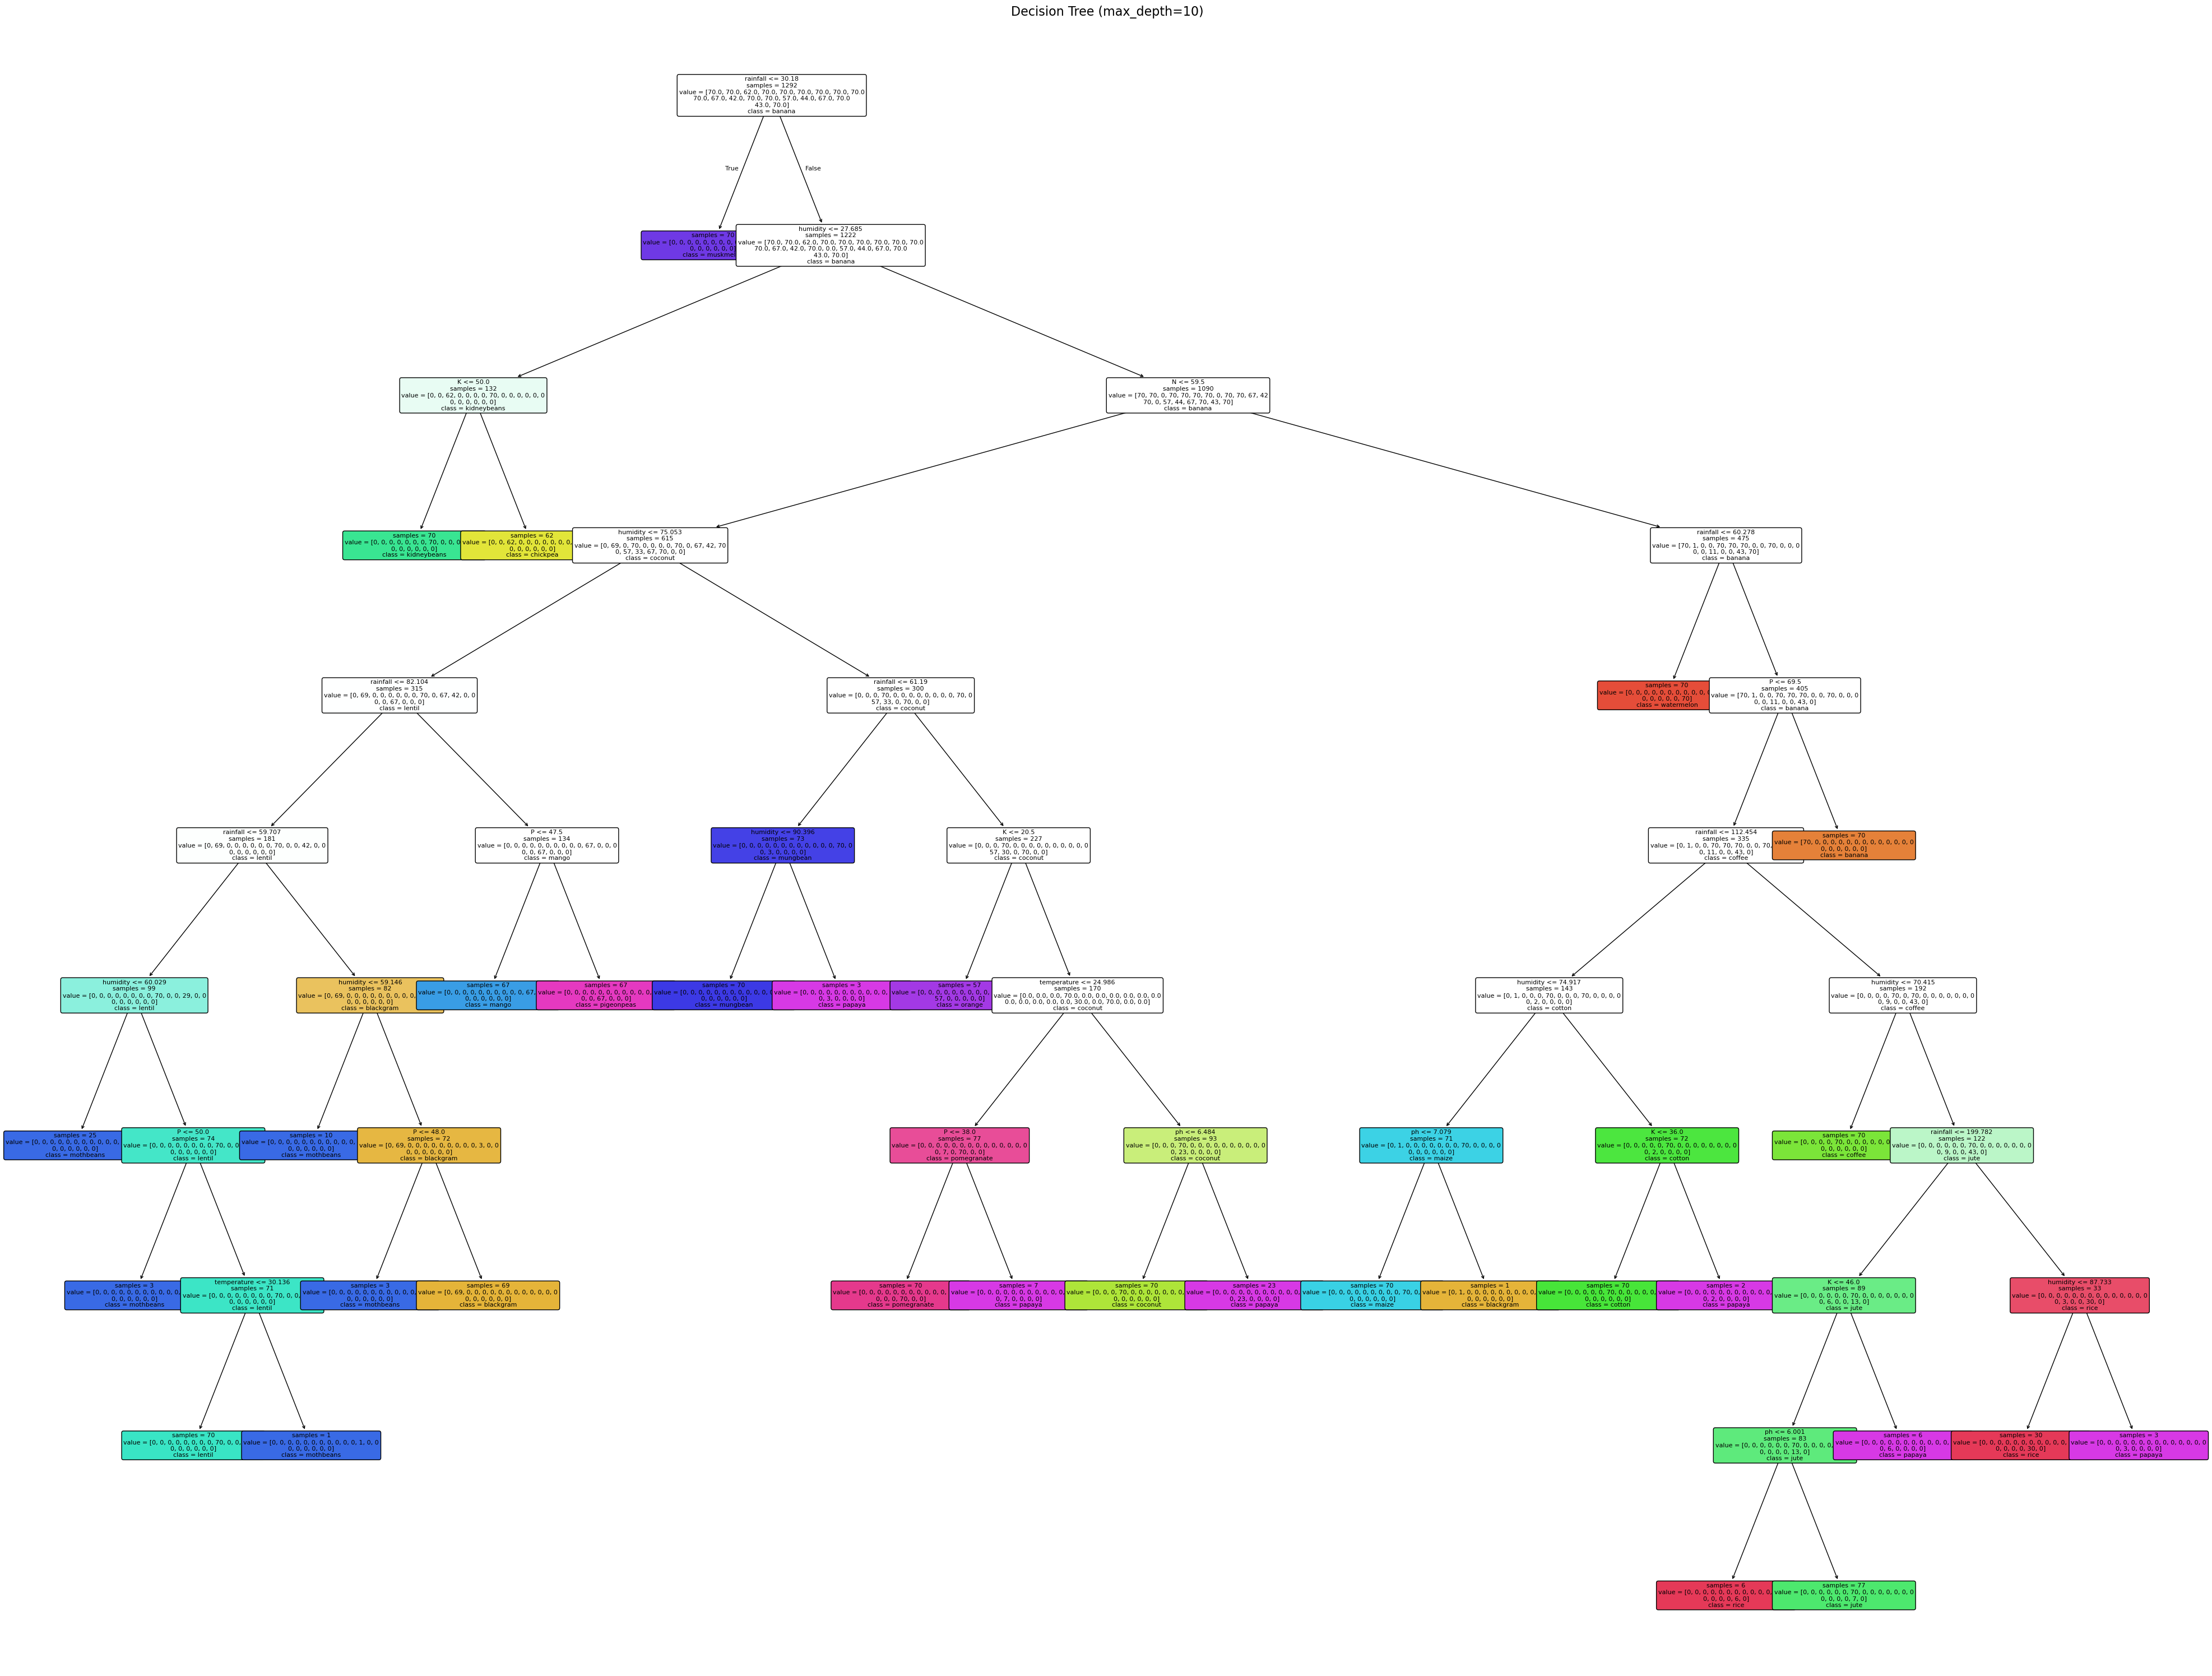

In [43]:
# Suponiendo que dt_final es tu árbol entrenado y ya tienes X, le y la codificación de clases
plt.figure(figsize=(40, 30))            # Hacemos la figura MUCHO más grande
plot_tree(
    dt_final,
    feature_names=list(X.columns),
    class_names=label_encoder.classes_,
    filled=True,
    rounded=True,
    fontsize=8,                        # Ajusta el tamaño de la fuente
    impurity=False                     # Oculta el valor de Gini para no saturar
)
plt.title(f"Decision Tree (max_depth={best_depth})", fontsize=16)
plt.tight_layout()                     # Para que no corte los bordes
plt.show()